## Machine Learning
#### MIIA 4200-01 (2019-I) - Ejercicio 4

<p>Profesor: Alejandro Correa</p>
<p>Estudiante: Oscar Andrés Mosquera </p>

* Regresión Lineal y Logistica

# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)
#income = pd.read_csv('income.csv', index_col=0)
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

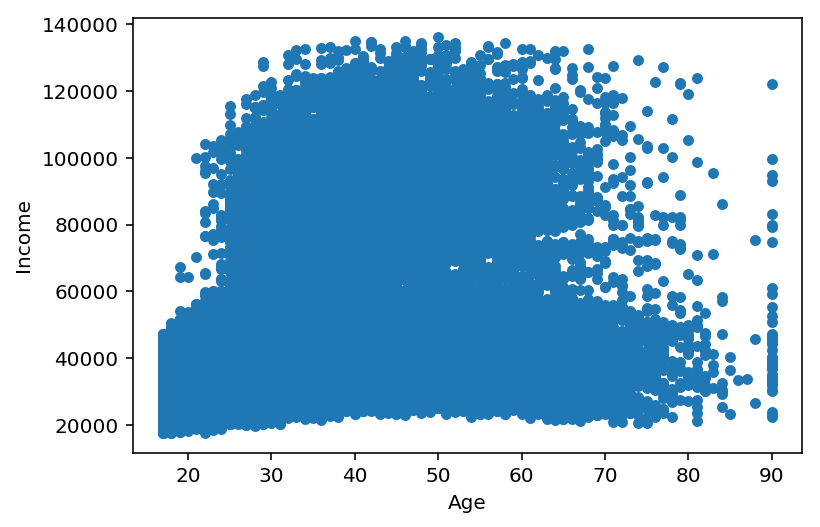

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

What is the relation between the age and Income?
- La relación es positiva, a mayor edad el ingreso aumenta, no se presenta mayor dispersión, presentando concentración de los 30 a los 60, y se identifican outlier cerca de los 90 años

For a one percent increase in the Age how much the income increases?

In [4]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
X = income[['Age']]
Y = income.Income
linreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
# make predictions for all values of X
income['income_pred'] = linreg.predict(X)
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,income_pred
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,53682.626757
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,59646.470984
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,53140.459100
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,61272.973956
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,47718.782529


- Se calcula el coeficiente de correlación

In [6]:
np.corrcoef(np.log(income['Age']), np.log(income['Income']))

array([[1.        , 0.36546776],
       [0.36546776, 1.        ]])

- El coeficiente de correlación indica que solo existe una relación lineal moderada entre las variables

In [7]:
# compute prediction for Age=39 using the equation
linreg.intercept_ + linreg.coef_ * 30

array([48803.11784304])

In [8]:
# compute prediction for Age=39 using the predict method
test = np.array(30)
test = test.reshape(-1,1)
linreg.predict(test)

array([48803.11784304])

In [9]:
# examine coefficient for Age
print(X, linreg.coef_)

       Age
0       39
1       50
2       38
3       53
4       28
5       37
6       49
7       52
8       31
9       42
10      37
11      30
12      23
13      32
14      40
15      34
16      25
17      32
18      38
19      43
20      40
21      54
22      35
23      43
24      59
25      56
26      19
27      54
28      39
29      49
...    ...
32531   30
32532   34
32533   54
32534   37
32535   22
32536   34
32537   30
32538   38
32539   71
32540   45
32541   41
32542   72
32543   45
32544   31
32545   39
32546   37
32547   43
32548   65
32549   43
32550   43
32551   32
32552   43
32553   32
32554   53
32555   22
32556   27
32557   40
32558   58
32559   22
32560   52

[32561 rows x 1 columns] [542.16765707]


Interpretacion: El 'ingreso' se aumenta en 542.16765707 unidades por cada unidad que se incremente en la 'edad'

In [10]:
# increasing Age by 1 increases income by 542.16765707
48803.11784304 + 542.16765707

49345.28550011

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

- Ingreso para 30 años

In [11]:
from sklearn.linear_model import LinearRegression

x = np.array([30])
linreg.predict(x.reshape(1, -1))

array([48803.11784304])

- Ingreso para 30 años = $ 48.803

In [12]:
x = np.array([40])
linreg.predict(x.reshape(1, -1))

array([54224.79441376])

- Ingreso para 40 años $ 54.224

# Exercise 4.2
Evaluate the model using the MSE

In [13]:
y_pred = linreg.predict(income[['Age']])

In [14]:
from sklearn import metrics

print('MSE:', metrics.mean_squared_error(Y, y_pred))

MSE: 593783043.8402299



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [15]:
income['Age2'] = income['Age'] ** 2
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,income_pred,Age2
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,53682.626757,1521
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,59646.470984,2500
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,53140.459100,1444
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,61272.973956,2809
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,47718.782529,784


- Using the OLS equations

In [16]:
betas_ols = np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T, Y))
betas_ols

array([1291.82348999])

In [17]:
linreg = LinearRegression(fit_intercept=False, normalize=False)
X = income[['Age', 'Age2']]
Y = income.Income
linreg.fit(X, Y)
linreg.coef_

array([2346.62896328,  -21.97439239])

In [18]:
y_pred = linreg.predict(X)

In [19]:
print('MSE:', metrics.mean_squared_error(Y, y_pred))

MSE: 549233115.8756605


- Al incluir Age$^2$ se disminuye el error cuadratico de 593783043.8402299 usando solo Age a 549233115.8756605

In [20]:
593783043.8402299 - 549233115.8756605

44549927.96456933

In [21]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

(array([  38.58164676, 1674.59915236]), array([  13.64022309, 1179.02941609]))

In [22]:
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]
X_[0:5]

array([[ 1.        ,  0.03067056, -0.13027593],
       [ 1.        ,  0.83710898,  0.70006807],
       [ 1.        , -0.04264203, -0.19558388],
       [ 1.        ,  1.05704673,  0.96214804],
       [ 1.        , -0.77576787, -0.75536635]])

- Using the OLS equations

In [23]:
betas_ols = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, Y))
betas_ols

array([ 53455.8091582 ,  42718.04340395, -36011.57934338])

# Making predictions

Predict the income when the Age is 40

In [24]:
x = np.array([30., 30.**2])

# scale
x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1, x_scaled]
x_

array([[ 1.        , -0.6291427 , -0.65698034]])

In [25]:
def lr_h(beta,x):
    return np.dot(beta, x.T)

y_pred = lr_h(betas_ols, x_)
y_pred

array([50238.96390027])

In [26]:
y_mean, y_std = Y.mean(), Y.std()
y_pred = y_pred * y_std + y_mean
y_pred

array([1.27941532e+09])

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

- Se incluyen las variables adicionales de:
    - Hours per week
    - Capital Gain
    - Capital Loss
    - Age2 (*)

In [27]:
linreg = LinearRegression(fit_intercept=True, normalize=True)
X = income[['Age', 'Hours per week', 'Capital Gain', 'Capital Loss', 'Age2']]
Y = income.Income
linreg.fit(X, Y)
linreg.coef_

array([ 2.41362856e+03,  3.59794724e+02,  6.16277599e-01,  7.71105853e+00,
       -2.27982270e+01])

In [28]:
y_pred = linreg.predict(X)

In [29]:
print('MSE:', metrics.mean_squared_error(Y, y_pred))

MSE: 494629779.5702483


- MSE: 549233115.8756605 con Age Age$^2$ - MSE: 494629779.5702483 con todas las varibles

El MSE se reduce aun más al agregar más variables - Lo cual indica que el modelo tiene un mejor ajuste.

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [44]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')
#data = pd.read_csv('churn.csv')

In [45]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [46]:
data._get_numeric_data().head

<bound method NDFrame.head of       Account Length  Area Code  VMail Message  Day Mins  Day Calls  \
0                128        415             25     265.1        110   
1                107        415             26     161.6        123   
2                137        415              0     243.4        114   
3                 84        408              0     299.4         71   
4                 75        415              0     166.7        113   
5                118        510              0     223.4         98   
6                121        510             24     218.2         88   
7                147        415              0     157.0         79   
8                117        408              0     184.5         97   
9                141        415             37     258.6         84   
10                65        415              0     129.1        137   
11                74        415              0     187.7        127   
12               168        408              0 

# Exercise 4.5

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

- Create Y and X

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
X = data[['VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls']]
Y = data['Churn?']

Como variable Y se toma el campo data['Churn?'] y para la X las variables cuantitativas

- What is the distribution of the churners?

In [35]:
distribution = data.pivot_table(values='Account Length', index=['Churn?'], aggfunc='count')
distribution

,Account Length
Churn?,
False.,2850
True.,483


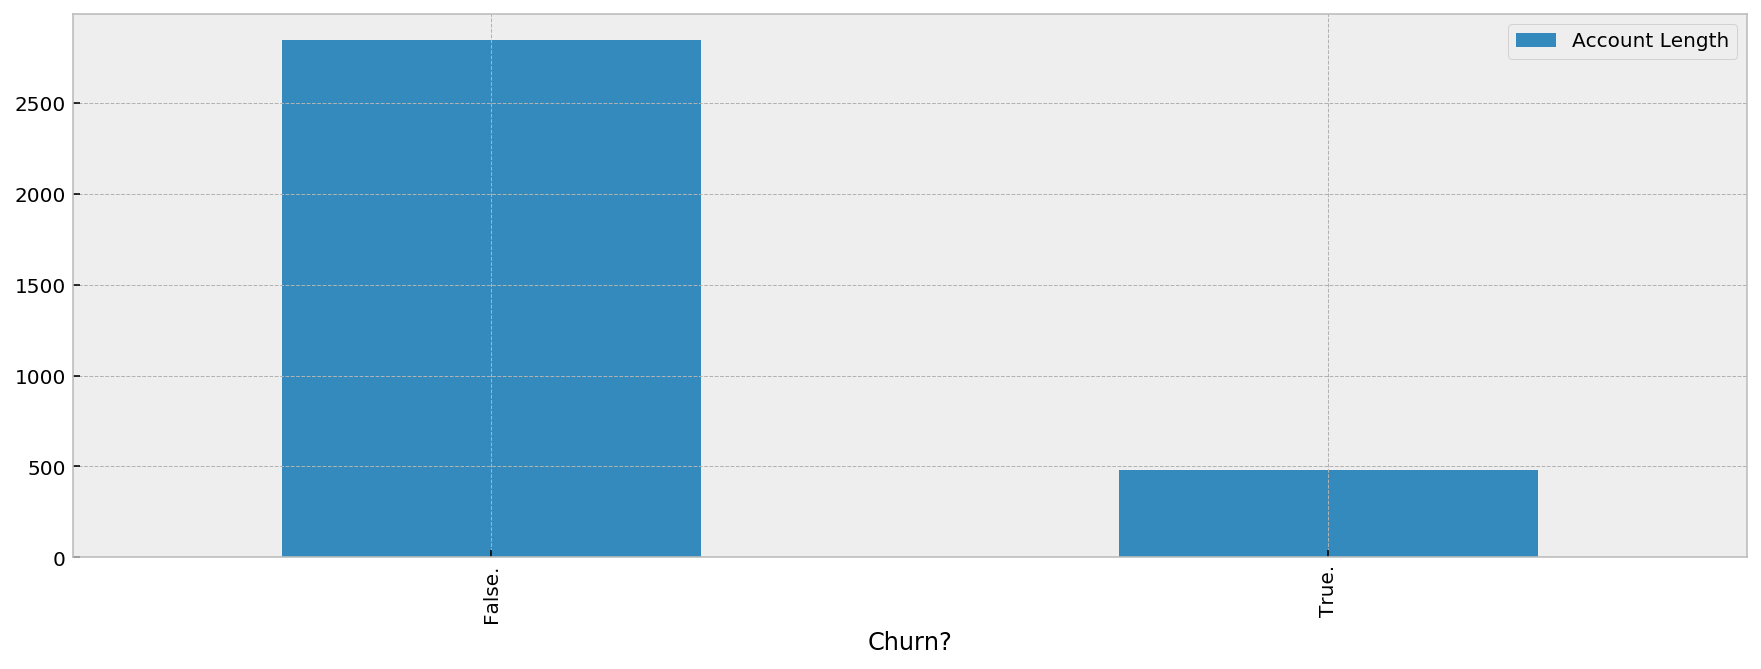

In [36]:
distribution.plot(kind='bar', figsize=(15,5))

In [37]:
percent = 483/(483+2850)*100
percent

14.491449144914492

Según el conjunto de datosdel proveedor de servicios de telecomunicaciones el 14.5% de sus clientes se pierden

- Split the data in train (70%) and test (30%)

In [38]:
name_cols = ['VMail Message','Day Mins','Day Calls','Day Charge','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','Intl Mins','Intl Calls','Intl Charge','CustServ Calls']

train=data.sample(frac=0.7,random_state=200)
test=data.drop(train.index)
X_train = train[name_cols]
X_test = test[name_cols]

Y_train = train['Churn?']
Y_test  = test['Churn?']

Se crean los conjuntos de datos train y test para ambas variables X y Y con la función sample 

# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [39]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [40]:
y_pred = logreg.predict(X_test)

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_pred)

array([[858,   9],
       [122,  11]])

- La matriz de confución genera los siguientes resultados:
    - 858, Verdaderos Positivos - 9, Falsos Negativos - 122, Falsos Positivos - 11, Verdaderos Negativos

b) Estimate the accuracy of the model in the 30% set

In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_pred)

0.869

- El porcentage de la data clasifica correctamente es del 87 %

In [43]:
Accuracy = (858+11)/(858+9+122+11)
Accuracy

0.869

A pesar de que la precisión del es modelo es alta, hay demaciados casos que no son desortes y el resultado podría ser sesgado